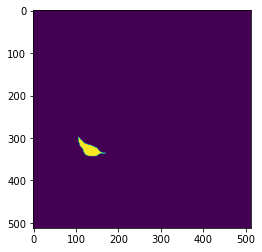

106 298 64 44


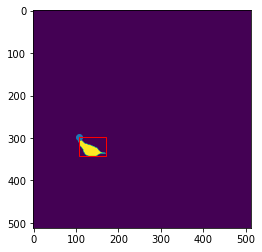

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import measure

root_dir = "../../"

data_dir = os.path.join(root_dir, "data")
ctich_dir = os.path.join(data_dir, "ct_ich")
mask_dir = os.path.join(ctich_dir, "masks")

for file in os.listdir(mask_dir):
    if ".nii" not in file:
        continue

    patient_number = int(file.split(".")[0].lstrip("0"))

    mask_nifti = nib.load(os.path.join(mask_dir, file))
    mask = np.asarray(mask_nifti.dataobj, dtype=int)
    mask = np.transpose(mask, (2, 1, 0))

    annotation_df = []
    for i in range(mask.shape[0]):
        if i + 1 != 16:
            continue

        slice_mask = mask[i, :, :].squeeze()

        conn_c, num_conn_c = measure.label(slice_mask, connectivity=2, return_num=True)
        plt.imshow(conn_c)
        plt.show()
        
        _, ax = plt.subplots()
        for j in range(1, num_conn_c + 1):
            row, column = (conn_c == j).nonzero()
            row_min = np.min(row)
            column_min = np.min(column)

            height = np.max(row) - row_min
            width = np.max(column) - column_min

            bbox = patches.Rectangle(
                (column_min, row_min),
                width,
                height,
                linewidth=1,
                edgecolor="r",
                facecolor="none",
            )
            print(column_min, row_min, width, height)
            ax.add_patch(bbox)
            ax.scatter(column_min, row_min)
        ax.imshow(slice_mask)
        break
    break
